In [1]:
import sys
from pathlib import Path
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import json
from natural.size import binarysize

ModuleNotFoundError: No module named 'natural'

In [2]:
from tqdm.auto import tqdm
tqdm.pandas(leave=False)

In [3]:
page_path = Path(f'data/train_topics_meta.jsonl')
page_file_size = page_path.stat().st_size
binarysize(page_file_size)

'19.50 MiB'

In [4]:
file = pd.read_json(page_path, lines=True)

titles = file.title[0]
ids = file.id[0]
keywords = file.keywords[0]
keywords_init = keywords.copy()
rel_docs = file.rel_docs[0]
urls = file.URL[0]

print(keywords['0'])

['cultivated', 'agricultural', 'maize', 'corn', 'fruit', 'wheat', 'agriculture', 'cultivar', 'olive', 'livestock', 'mammal', 'honeybee', 'potato', 'poultry', 'solanum', 'bee', 'cornbread', 'beekeeping', 'honeycrop', 'cherimoya', 'potatoe', 'oleaceae', 'beekeeper', 'cherimola', 'pig', 'honey',  'cornstarch', 'beehive', 'beeline', 'porcine', 'beewolf', 'cornmeal', 'corncob', 'beeswax', 'sugarcane', 'maizegdb', 'cereal', 'chirimuya', 'cattle', 'grain', 'honeycomb', 'umbonata', 'oleae', 'annonaceae', 'hive', 'buffalo', 'chicken', 'sorghum', 'rice',  'cornstalk', 'popcorn', 'strawberry', 'nectar', 'flour', 'plumage',  'rodent', 'vegetable', 'breeding', 'fowl', 'solanaceae', 'cavy', 'olea', 'mammalian', 'pear', 'nutrition', 'hamster', 'cavia',  'banana', 'buffalopedia', 'caviae',  'rabbit', 'polyphenols', 'river', 'botanical', 'citrus', 'polyphenol', 'bubalus', 'freshwater', 'mellifera', 'hen',  'breed', 'insect', 'apidae',  'planting',  'pollen', 'amnuaydechkorn',  'kapi', 'soybean', 'produ

In [5]:
from itertools import chain
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def get_synonyms(word):
    synonyms = wordnet.synsets(word)
    return list(set(chain.from_iterable([word.lemma_names() for word in synonyms])))

def string_to_list(str_lst):
    if not isinstance(str_lst, list): 
        return str_lst.replace("'", "").strip("][").split(", ")
    else:
        return lst
    
def get_synsets(inp):
    synsets = []
    words = [
                word 
                for word in inp.split(" ")
                if not word in STOPWORDS
            ]
    #print(words)
    for word in words:
        synsets += wordnet.synsets(word)
    #print(synsets)
    return synsets

In [6]:
from nltk.metrics import binary_distance
from itertools import product


for i in tqdm(range(0,46)):
    wordlist_old = string_to_list(keywords_init[f'{i}'])
    wordlist = list(set(sum([get_synonyms(w) + [w] for w in wordlist_old], [])))
    
    similarities = []
    s2 = get_synsets(titles[f'{i}'])
    
    for word in wordlist:
        sims = []
        s1 = get_synsets(word)
        for sense1, sense2 in product(s1, s2):
            sims.append(sense1.path_similarity(sense2))

        if (len(sims)>0):
            avgsims = sum(sims)/len(sims)
            similarities.append(avgsims)
        else:
            similarities.append(-1)

    wordsims = zip(wordlist, similarities)
    keywords[f'{i}'] = wordlist if s2 == [] else [word[0] for word in wordsims if word[1]>=0.075]


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:20<00:00,  2.26it/s]


Agriculture


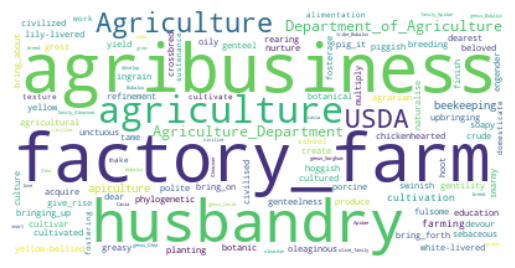

Amphibians and Reptiles


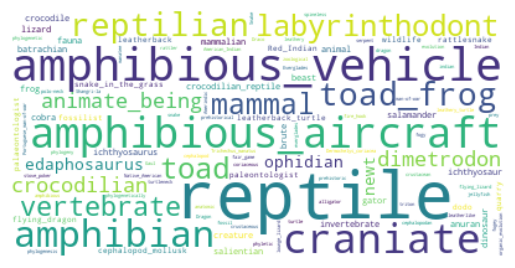

Astronomy


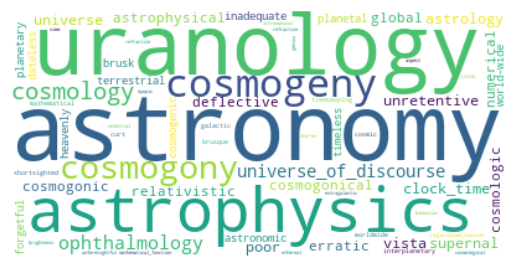

Aviation


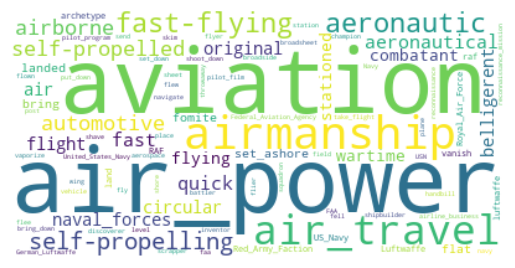

Biography/WikiProject Actors and Filmmakers


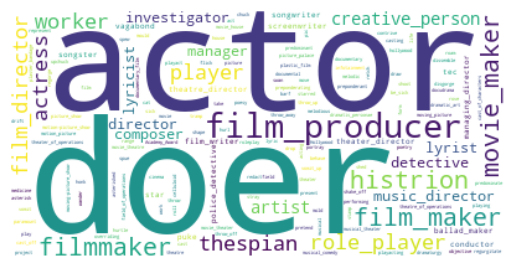

Biography/WikiProject Musicians


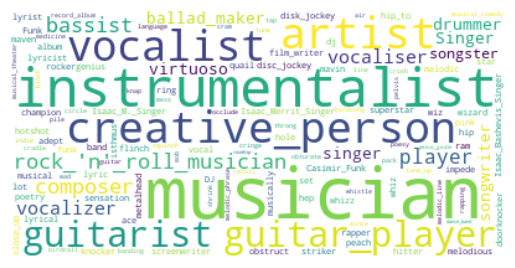

Biography/science and academia work group


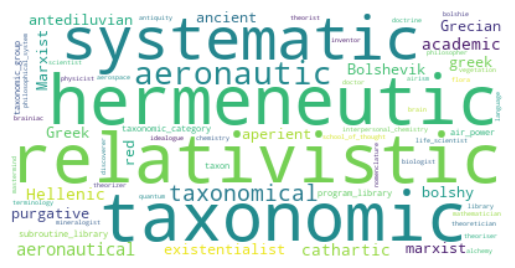

Birds


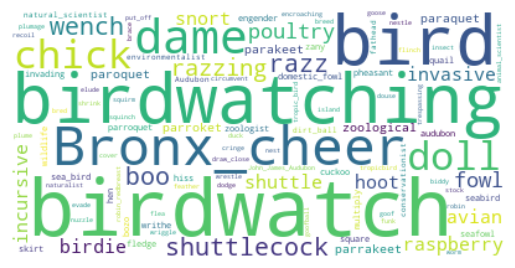

Books


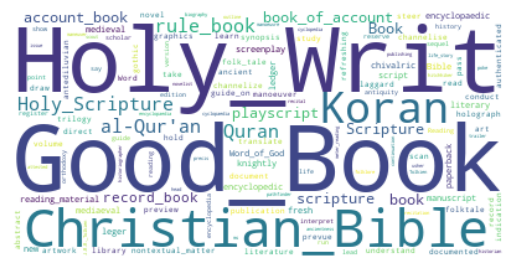

Business


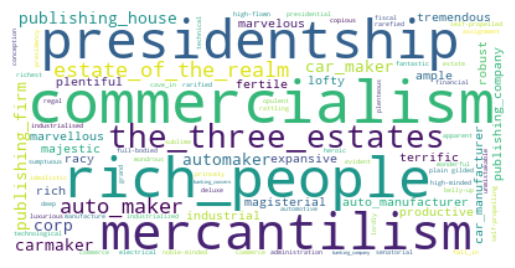

Chemicals


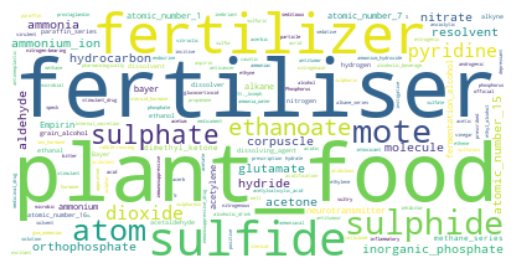

Christianity


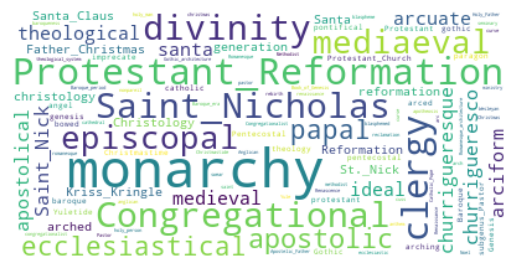

Cities


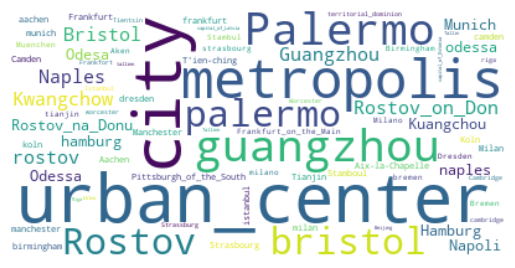

Classical music


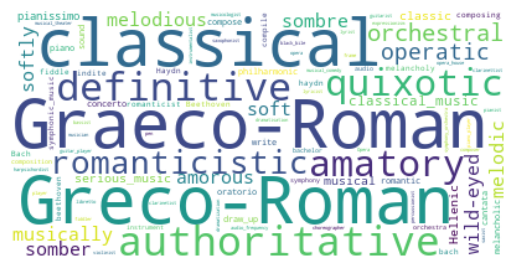

Computer science


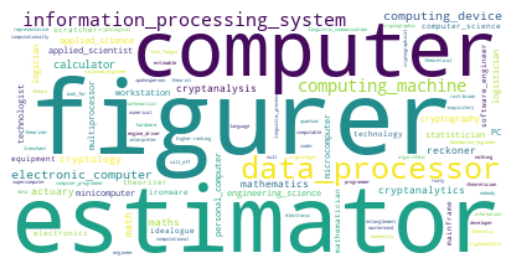

Computing


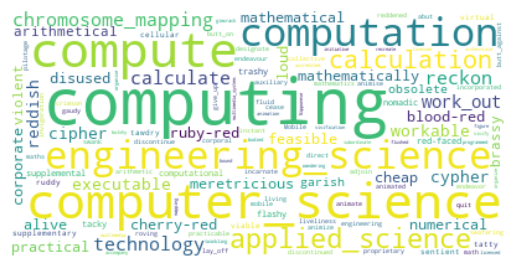

Cricket


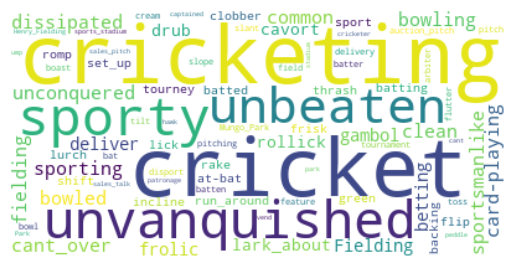

Crime and Criminal Biography


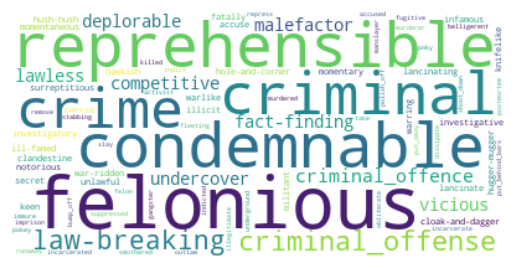

Cycling


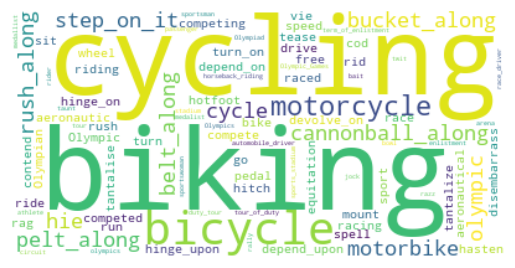

Dams


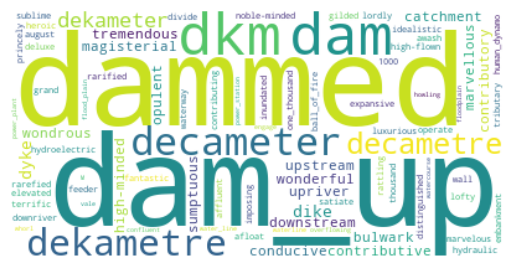

Engineering


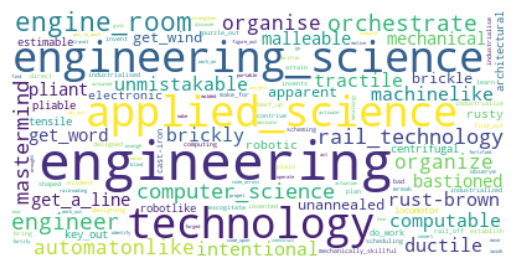

Film/American cinema task force


Former countries


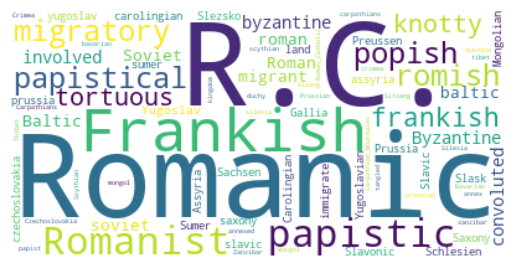

Geography


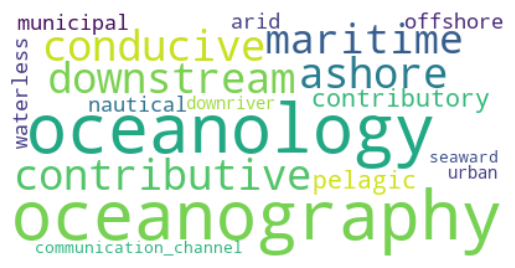

Human rights


Insects


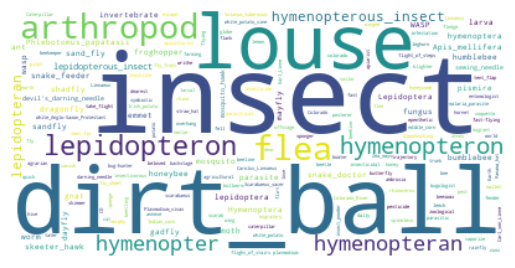

Islam


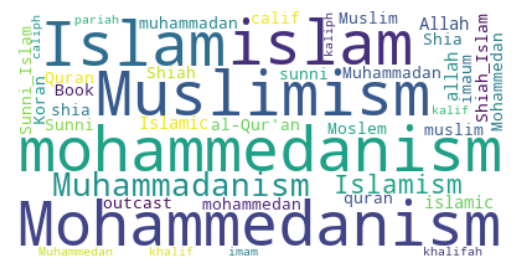

Japan


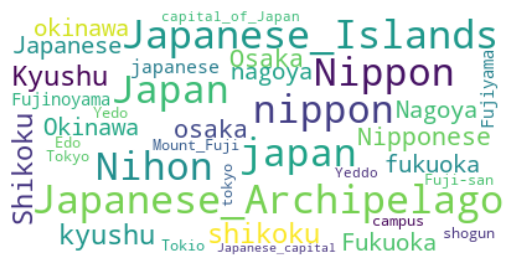

Japan/Biography task force


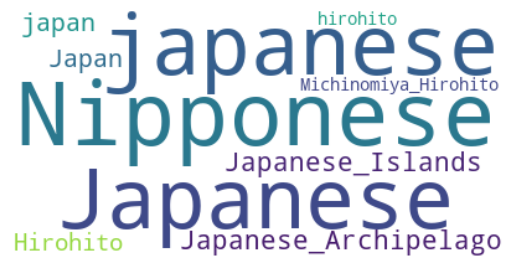

Jewish history


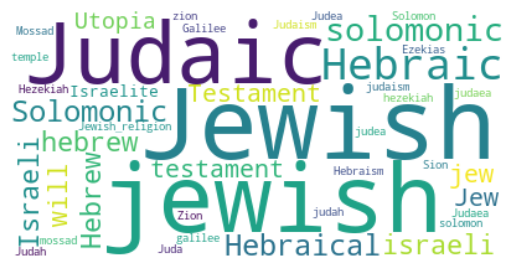

Languages


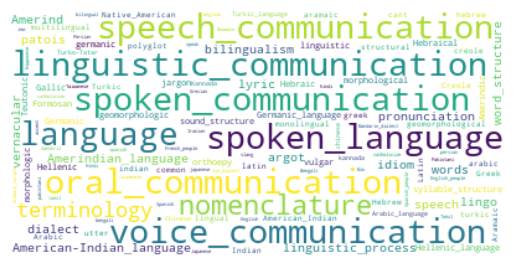

Literature


Medicine


Middle Ages


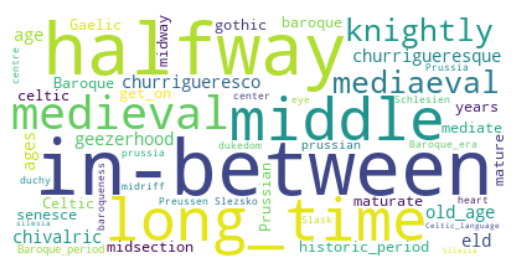

Military history


Military history/Maritime warfare task force


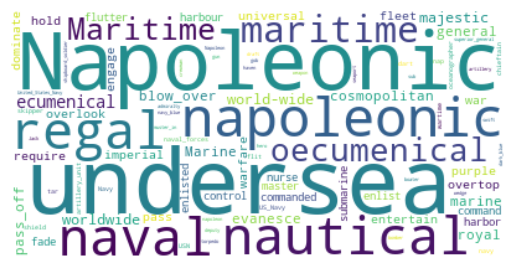

Motorsport
Netherlands


C:\Users\marta\AppData\Local\Temp\ipykernel_14240\2743122797.py:8: RuntimeWarning: Mean of empty slice.
  scores = [np.array([se1.path_similarity(se2) for se1, se2 in product(get_synsets(word), s2)]).mean() for word in text]
C:\Users\marta\anaconda3\envs\pyserini\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


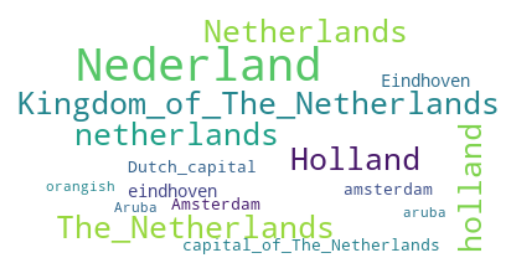

Photography


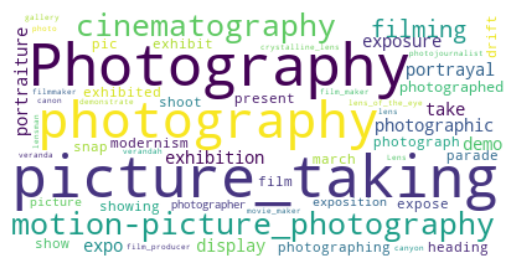

Politics


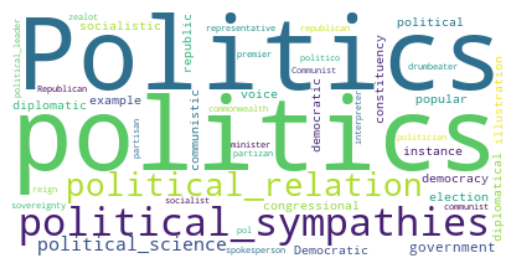

Skiing and Snowboarding


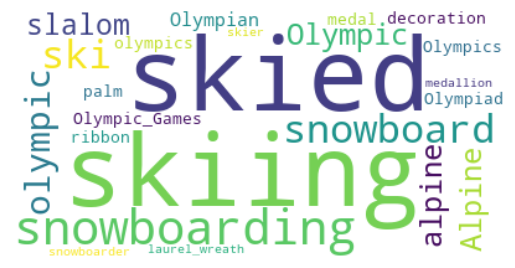

Southeast Asia


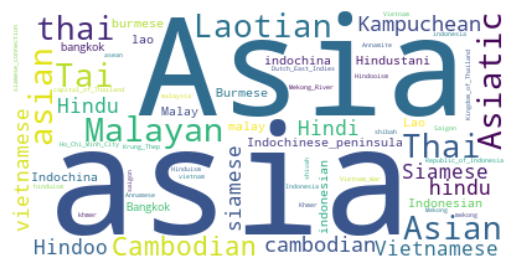

Television


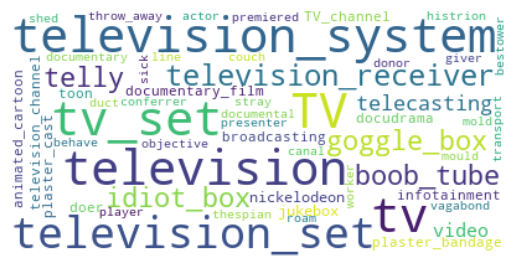

Tennis


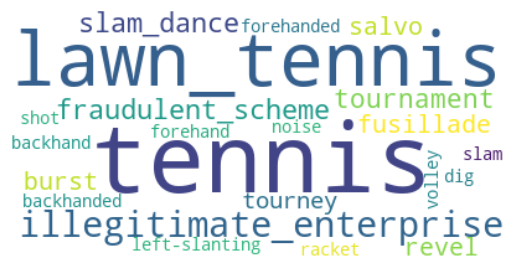

Trains


Video games


In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for i in range(46):
    try:
        print(titles[f'{i}'])
        text = keywords[f'{i}']#' '.join([titles[f'{i}']]*10+keywords[f'{i}'])
        s2 = get_synsets(titles[f'{i}'])
        scores = [np.array([se1.path_similarity(se2) for se1, se2 in product(get_synsets(word), s2)]).mean() for word in text]
        
        d = {w: f for w, f in
                 zip(text, scores)
               }
        
        stopwords = set(STOPWORDS)
        wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate_from_frequencies(d)


        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    except:
        continue
